In [1]:
import pandas as pd
import requests

In [2]:
url = 'https://pt.wikipedia.org/wiki/Copa_do_Mundo_FIFA'

# Requisitar a página e guardar a resposta
resposta = requests.get(url)

# Obter a resposta em formato HTML
table = pd.read_html(resposta.text)

In [6]:
# Queremos apenas a tabelaa com pagantes por final
# Essa é a 12ª tabela dos dados retornados

df = table[11]

In [8]:
df.head(2)

,Edição,Ano,Estádio,Local,Público pagante
0,I,1930,Estádio Centenário,Montevidéu,68.346
1,II,1934,Estádio do Partido Nacional Fascista,Roma,55.000


In [9]:
# Mudar o nome das colunas usando a primeira linha
# df.columns = df.iloc[0]

In [10]:
# Apagando a primeira linha
df.drop(df.index[0], inplace=True)

In [11]:
df.head(2)

,Edição,Ano,Estádio,Local,Público pagante
1,II,1934,Estádio do Partido Nacional Fascista,Roma,55.0
2,III,1938,Estádio Olímpico Yves-du-Manoir,Colombes,45.0


In [13]:
# Vamos analisar o tipo das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 1 to 20
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Edição           20 non-null     object 
 1   Ano              20 non-null     int64  
 2   Estádio          20 non-null     object 
 3   Local            20 non-null     object 
 4   Público pagante  20 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 960.0+ bytes


In [15]:
# Supondo que a coluna "Público pagante" esteja como 'object',
# como mudar o tipo da coluna para 'float'?
# df['Público pagante'] = df['Público pagante'].astype(float)

# como mudar para int?
# df['Público pagante'] = df['Público pagante'].str.replace('.', '').astype(int)
# obs: para mudar para inteiro, tem que eliminar o 'ponto' nos dados

In [16]:
# Vamos construir um gráfico com a evolução do público pagante
# Importando novas bibliotecas para gráficos

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<function matplotlib.pyplot.show(close=None, block=None)>

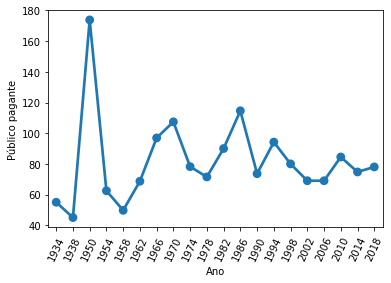

In [18]:
# Exibir o gráfico de linhas e colocar uma marcação em cada ponto
sns.pointplot(x='Ano', y='Público pagante', data=df, )

# Ajustando as legendas
plt.xticks(rotation=65)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

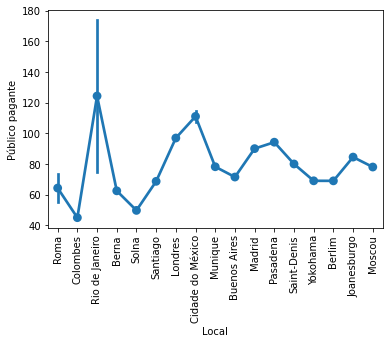

In [20]:
# Exibir o gráfico de linhas e colocar uma marcação em cada ponto
sns.pointplot(x='Local', y='Público pagante', data=df, )

# Ajustando as legendas
plt.xticks(rotation=90)
plt.show

In [21]:
# Crie um df apenas com os jogos no Rio de Janeiro
df[df['Local'] == 'Rio de Janeiro']

,Edição,Ano,Estádio,Local,Público pagante
3,IV,1950,Estádio do Maracanã,Rio de Janeiro,173.850
19,XX,2014,Estádio do Maracanã,Rio de Janeiro,74.738
